## Creation of a synthetic trading instrument

   ###      One of the ways to reduce trading risks and avoid dependence on market trends is to create your own trading instrument with certain properties characteristic of a stationary time series, namely, with the property of a constantly return to the mean value.
   
   ###      The general idea is this: you need to select two existing trading instruments that have a fundamental relationship with each other, preferably with a high correlation coefficient (absolute). Express one instrument (Y) through another (X) using a regression model. And then subtract from the price of one instrument (Y) the price of another (X), multiplied by the regression coefficient. Thus, we get a graph of "noise" or errors (synthetic trading instrument). And if this chart is a stationary time series, then it is perfect for trading range strategies.

### Let's try to build a synthetic instrument (spread or difference) based on Oil (light sweet) and Fuel oil futures contracts. Due to the fact that they both represent the energy sector, and fuel oil is a derivative of oil, it can be assumed that there is a strong fundamental relationship between them. We will download data of daily closing prices of these instruments from the Metatrader 4 terminal in CSV format and create a pandas dataframe out of them.

In [1]:
import pandas as pd

### Getting Fuel oil data

In [2]:
column_names = ['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume']
Data_HO = pd.read_csv('https://raw.githubusercontent.com/gelono/github-first/f28b5374d4cfd3a9af6c4dbd680adee19e8375d4/HO1440.csv', header = None, names = column_names)
Data_HO.head()

,Date,Time,Open,High,Low,Close,Volume
0,2011.03.03,00:00,3.0602,3.0659,3.0114,3.0529,1018
1,2011.03.04,00:00,3.0529,3.0924,3.0510,3.0834,524
2,2011.03.07,00:00,3.1097,3.1371,3.0363,3.0447,1367
3,2011.03.08,00:00,3.0447,3.0703,2.9824,3.0000,1312
4,2011.03.09,00:00,3.0000,3.0899,2.9929,3.0868,1073


In [3]:
Data_HO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2412 entries, 0 to 2411
Data columns (total 7 columns):
Date      2412 non-null object
Time      2412 non-null object
Open      2412 non-null float64
High      2412 non-null float64
Low       2412 non-null float64
Close     2412 non-null float64
Volume    2412 non-null int64
dtypes: float64(4), int64(1), object(2)
memory usage: 132.0+ KB


### Let's take data from the beginning of 2017

In [4]:
import numpy as np
print(np.where(Data_HO['Date'] == '2017.01.03'))

(array([1512], dtype=int64),)


In [5]:
Data_HO.drop(Data_HO.index[range(1512)], inplace = True)
Data_HO.head()

,Date,Time,Open,High,Low,Close,Volume
1512,2017.01.03,00:00,1.7294,1.7639,1.6717,1.6821,32196
1513,2017.01.04,00:00,1.6832,1.6981,1.6644,1.6866,29120
1514,2017.01.05,00:00,1.6856,1.7048,1.6697,1.6956,29080
1515,2017.01.06,00:00,1.6972,1.7139,1.6771,1.6958,27792
1516,2017.01.09,00:00,1.7009,1.7021,1.6334,1.6337,24710


In [6]:
Data_HO = Data_HO.reset_index(drop=True)
Data_HO.head()

,Date,Time,Open,High,Low,Close,Volume
0,2017.01.03,00:00,1.7294,1.7639,1.6717,1.6821,32196
1,2017.01.04,00:00,1.6832,1.6981,1.6644,1.6866,29120
2,2017.01.05,00:00,1.6856,1.7048,1.6697,1.6956,29080
3,2017.01.06,00:00,1.6972,1.7139,1.6771,1.6958,27792
4,2017.01.09,00:00,1.7009,1.7021,1.6334,1.6337,24710


### We convert date data to datetime type

In [7]:
Data_HO['Date'] = pd.to_datetime(Data_HO['Date'])
Data_HO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 7 columns):
Date      900 non-null datetime64[ns]
Time      900 non-null object
Open      900 non-null float64
High      900 non-null float64
Low       900 non-null float64
Close     900 non-null float64
Volume    900 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 49.3+ KB


In [8]:
Data_HO.head()

,Date,Time,Open,High,Low,Close,Volume
0,2017-01-03,00:00,1.7294,1.7639,1.6717,1.6821,32196
1,2017-01-04,00:00,1.6832,1.6981,1.6644,1.6866,29120
2,2017-01-05,00:00,1.6856,1.7048,1.6697,1.6956,29080
3,2017-01-06,00:00,1.6972,1.7139,1.6771,1.6958,27792
4,2017-01-09,00:00,1.7009,1.7021,1.6334,1.6337,24710


### Getting Oil data

In [9]:
column_names = ['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume']
Data_CL = pd.read_csv('https://raw.githubusercontent.com/gelono/github-first/master/CL1440.csv', header = None, names = column_names)
Data_CL.head()

,Date,Time,Open,High,Low,Close,Volume
0,2008.10.08,00:00,89.56,90.98,86.04,88.79,912
1,2008.10.09,00:00,88.79,89.81,84.18,84.93,741
2,2008.10.10,00:00,84.93,85.12,77.09,80.12,1126
3,2008.10.13,00:00,80.12,82.51,79.45,82.00,425
4,2008.10.14,00:00,82.00,84.82,78.31,78.75,978


### We also take data from the beginning of 2017 and convert date data to datetime type

In [10]:
print(np.where(Data_CL['Date'] == '2017.01.03'))

(array([2121], dtype=int64),)


In [11]:
Data_CL.drop(Data_CL.index[range(2121)], inplace = True)
Data_CL.head()

,Date,Time,Open,High,Low,Close,Volume
2121,2017.01.03,00:00,54.12,55.22,52.11,52.47,13897
2122,2017.01.04,00:00,52.50,53.37,52.14,53.34,11522
2123,2017.01.05,00:00,53.37,54.10,52.79,53.75,10866
2124,2017.01.06,00:00,53.73,54.30,53.31,53.65,10411
2125,2017.01.09,00:00,53.76,53.81,51.75,51.77,8520


In [12]:
Data_CL = Data_CL.reset_index(drop = True)
Data_CL.head()

,Date,Time,Open,High,Low,Close,Volume
0,2017.01.03,00:00,54.12,55.22,52.11,52.47,13897
1,2017.01.04,00:00,52.50,53.37,52.14,53.34,11522
2,2017.01.05,00:00,53.37,54.10,52.79,53.75,10866
3,2017.01.06,00:00,53.73,54.30,53.31,53.65,10411
4,2017.01.09,00:00,53.76,53.81,51.75,51.77,8520


In [13]:
Data_CL['Date'] = pd.to_datetime(Data_CL['Date'])
Data_CL.dtypes

Date      datetime64[ns]
Time              object
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [14]:
Data_CL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 7 columns):
Date      900 non-null datetime64[ns]
Time      900 non-null object
Open      900 non-null float64
High      900 non-null float64
Low       900 non-null float64
Close     900 non-null float64
Volume    900 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 49.3+ KB


### We need data about the date and the closing price. We will delete the rest of the data.

In [15]:
Data_HO.drop(['Time', 'Open', 'High', 'Low', 'Volume'], axis = 1, inplace = True)
Data_HO.head()

,Date,Close
0,2017-01-03,1.6821
1,2017-01-04,1.6866
2,2017-01-05,1.6956
3,2017-01-06,1.6958
4,2017-01-09,1.6337


### Let's rename the columns with closing prices so that we can further distinguish them

In [16]:
Data_HO.rename(columns = {'Close': 'Close_HO'}, inplace = True)
Data_HO.head()

,Date,Close_HO
0,2017-01-03,1.6821
1,2017-01-04,1.6866
2,2017-01-05,1.6956
3,2017-01-06,1.6958
4,2017-01-09,1.6337


In [17]:
Data_CL.drop(['Time', 'Open', 'High', 'Low', 'Volume'], axis = 1, inplace = True)
Data_CL.rename(columns = {'Close': 'Close_CL'}, inplace = True)
Data_CL.head()

,Date,Close_CL
0,2017-01-03,52.47
1,2017-01-04,53.34
2,2017-01-05,53.75
3,2017-01-06,53.65
4,2017-01-09,51.77


### Some dates and closing prices may be missing in the data of one of the instruments. Therefore, it is necessary to align the data of both instruments by dates so that they match exactly.

In [18]:
i = 0
while i < len(Data_HO['Date']):
    if Data_HO['Date'][i] != Data_CL['Date'][i]:
        if Data_HO['Date'][i] < Data_CL['Date'][i]:
            Data_HO.drop([i], inplace = True)
            Data_HO = Data_HO.reset_index(drop=True)
            #i = i + 1
        else: 
            Data_CL.drop([i], inplace = True)
            Data_CL = Data_CL.reset_index(drop=True)
            #i = i + 1
    else: i = i + 1
        
print(Data_HO.tail())
print(Data_CL.tail())

          Date  Close_HO
894 2020-06-22    1.2282
895 2020-06-23    1.2109
896 2020-06-24    1.1634
897 2020-06-25    1.1738
898 2020-06-26    1.1768
          Date  Close_CL
894 2020-06-22     40.56
895 2020-06-23     39.98
896 2020-06-24     38.06
897 2020-06-25     39.01
898 2020-06-26     39.00


### Find the correlation coefficient (Pearson) for Oil and Fuel oil

In [19]:
from scipy import stats
stats.pearsonr(Data_HO['Close_HO'], Data_CL['Close_CL'])
#np.corrcoef(Data_HO['Close_HO'], Data_CL['Close_CL'])

(0.9564696488468384, 0.0)

#### As we can see, the coefficient is 0.956 - quite high. The relationship between these instruments is quite close.

### Let's put the closing prices of oil and fuel oil in one dataframe

In [20]:
Data_HO['Close_CL'] = Data_CL['Close_CL']
Data_HO.head()

,Date,Close_HO,Close_CL
0,2017-01-03,1.6821,52.47
1,2017-01-04,1.6866,53.34
2,2017-01-05,1.6956,53.75
3,2017-01-06,1.6958,53.65
4,2017-01-09,1.6337,51.77


In [21]:
Data_HO.tail()

,Date,Close_HO,Close_CL
894,2020-06-22,1.2282,40.56
895,2020-06-23,1.2109,39.98
896,2020-06-24,1.1634,38.06
897,2020-06-25,1.1738,39.01
898,2020-06-26,1.1768,39.00


### Change the name of the dataframe

In [22]:
Data_Spread = Data_HO
Data_Spread.tail()

,Date,Close_HO,Close_CL
894,2020-06-22,1.2282,40.56
895,2020-06-23,1.2109,39.98
896,2020-06-24,1.1634,38.06
897,2020-06-25,1.1738,39.01
898,2020-06-26,1.1768,39.00


### Let's build charts for closing prices

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


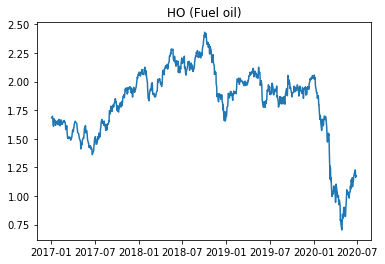

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
x = Data_Spread['Date']
y = Data_Spread['Close_HO']
plt.plot(x, y)
plt.title('HO (Fuel oil)');

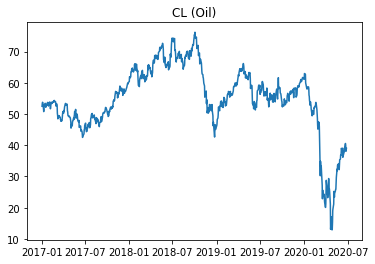

In [24]:
x = Data_Spread['Date']
y = Data_Spread['Close_CL']
plt.plot(x, y)
plt.title('CL (Oil)');

### Let's use a linear regression equation to get the coefficient we want. Let's express Oil through Fuel oil.

In [25]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
#train_x = np.asanyarray(Data_Spread[['Close_HO']])
#train_y = np.asanyarray(Data_Spread[['Close_CL']])
x = Data_Spread[['Close_HO']]
y = Data_Spread[['Close_CL']]
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)


Coefficients:  [[31.73915174]]


### Let's get data for our synthetic instrument

In [26]:
Data_Spread['CL-HO'] = Data_Spread['Close_CL'] - regr.coef_[0][0] * Data_Spread['Close_HO']
Data_Spread.head()

,Date,Close_HO,Close_CL,CL-HO
0,2017-01-03,1.6821,52.47,-0.918427
1,2017-01-04,1.6866,53.34,-0.191253
2,2017-01-05,1.6956,53.75,-0.066906
3,2017-01-06,1.6958,53.65,-0.173254
4,2017-01-09,1.6337,51.77,-0.082252


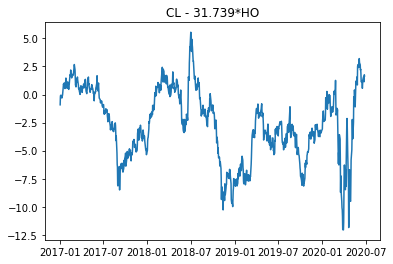

In [27]:
x = Data_Spread['Date']
y = Data_Spread['CL-HO']
plt.plot(x, y)
plt.title('CL - 31.739*HO');

### Let's check if the given time series is stationary. To do this, we use the Dickey-Fuller test and the p-value

In [28]:
from statsmodels.tsa.stattools import adfuller
X = Data_Spread['CL-HO']
result = adfuller(X)
#print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

p-value: 0.016149


#### As we can see above, the p-value is less than 0.05 - this means that this time series can be considered stationary (it has the property of returning to the mean value)

### Now we need to convert the data on closing prices into data on the cumulative cash yield of each trading instrument. To do this, we will calculate the daily rise / fall in pips and multiply it by the standard pip value for 1 contract.

In [29]:
n = len(Data_Spread['Date'])
HO_tick_value = 4.2
CL_tick_value = 10
vals_ho = [0] * n
vals_cl = [0] * n
vals_ho_cum = [0] * n
vals_cl_cum = [0] * n
for i in range(1, n):    
    vals_ho[i] = (Data_Spread['Close_HO'][i] - Data_Spread['Close_HO'][i-1]) * 10000 * HO_tick_value
    vals_cl[i] = (Data_Spread['Close_CL'][i] - Data_Spread['Close_CL'][i-1]) * 100 * CL_tick_value
    vals_ho_cum[i] = vals_ho_cum[i-1] + vals_ho[i]
    vals_cl_cum[i] = vals_cl_cum[i-1] + vals_cl[i]


In [30]:
df = pd.DataFrame({'HO_USD': vals_ho, 'CL_USD': vals_cl, 'HO_USD_CUM': vals_ho_cum, 'CL_USD_CUM': vals_cl_cum})
Data_Spread[['HO_USD', 'CL_USD', 'HO_USD_CUM', 'CL_USD_CUM']] = df[['HO_USD', 'CL_USD', 'HO_USD_CUM', 'CL_USD_CUM']]
Data_Spread.head()

,Date,Close_HO,Close_CL,CL-HO,HO_USD,CL_USD,HO_USD_CUM,CL_USD_CUM
0,2017-01-03,1.6821,52.47,-0.918427,0.0,0.0,0.0,0.0
1,2017-01-04,1.6866,53.34,-0.191253,189.0,870.0,189.0,870.0
2,2017-01-05,1.6956,53.75,-0.066906,378.0,410.0,567.0,1280.0
3,2017-01-06,1.6958,53.65,-0.173254,8.4,-100.0,575.4,1180.0
4,2017-01-09,1.6337,51.77,-0.082252,-2608.2,-1880.0,-2032.8,-700.0


### Let's find the regression coefficient between the data of the cumulative profitability of the instruments and plot the yield spread chart

In [31]:
x_usd = Data_Spread[['HO_USD_CUM']]
y_usd = Data_Spread[['CL_USD_CUM']]
regr.fit (x_usd, y_usd)
# The coefficients
print ('Coefficients: ', regr.coef_)


Coefficients:  [[0.75569409]]


In [32]:
Data_Spread['CL-HO_USD'] = Data_Spread['CL_USD_CUM'] - regr.coef_[0][0] * Data_Spread['HO_USD_CUM']
Data_Spread.head()

,Date,Close_HO,Close_CL,CL-HO,HO_USD,CL_USD,HO_USD_CUM,CL_USD_CUM,CL-HO_USD
0,2017-01-03,1.6821,52.47,-0.918427,0.0,0.0,0.0,0.0,0.000000
1,2017-01-04,1.6866,53.34,-0.191253,189.0,870.0,189.0,870.0,727.173817
2,2017-01-05,1.6956,53.75,-0.066906,378.0,410.0,567.0,1280.0,851.521452
3,2017-01-06,1.6958,53.65,-0.173254,8.4,-100.0,575.4,1180.0,745.173621
4,2017-01-09,1.6337,51.77,-0.082252,-2608.2,-1880.0,-2032.8,-700.0,836.174944


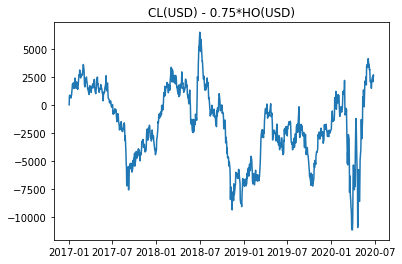

In [33]:
x = Data_Spread['Date']
y = Data_Spread['CL-HO_USD']
plt.plot(x, y)
plt.title('CL(USD) - 0.75*HO(USD)');

#### As we can see, the coefficient is 0.75. This means that in order to obtain a stationary time series based on the difference in the cumulative yields of our instruments, it is necessary to multiply the cost of a pip for Fuel oil by 0.75. That is, the ratio of the value of points should be 10 to 0.75x4.2, which equals 3.17. This ratio is fulfilled when trading 4 oil contracts and 3 fuel oil contracts simultaneously (4x10 / 3x4.2 = 3.17). In other words: when the spread chart (CL - 31.739xHO) approaches the upper border of the fluctuation range (2.5) you need to sell 4 Oil contracts and buy 3 Fuel oil contracts. Near the lower border (-9.0), do the opposite - buy 4 Oil contracts and sell 3 Fuel oil contracts. In the middle of the range, trades are closed with a total profit.

### Let's load the Brent crude oil data and see what the spread between Brent crude and fuel oil is. Prepare and align data for the same period of time - from the beginning of 2017

In [35]:
Data_BRN = pd.read_csv('https://raw.githubusercontent.com/gelono/github-first/master/BRN1440.csv', header = None, names = column_names)
Data_BRN.head()                     

,Date,Time,Open,High,Low,Close,Volume
0,2008.12.17,00:00,47.78,48.90,45.29,45.35,480
1,2008.12.18,00:00,45.35,46.67,43.20,43.42,502
2,2008.12.19,00:00,43.42,45.14,43.03,44.64,301
3,2008.12.22,00:00,44.64,44.77,41.03,41.04,389
4,2008.12.23,00:00,41.04,42.02,39.20,40.60,521


In [36]:
Data_BRN['Date'] = pd.to_datetime(Data_BRN['Date'])
Data_BRN.drop(['Time', 'Open', 'High', 'Low', 'Volume'], axis = 1, inplace = True)
Data_BRN.head()

,Date,Close
0,2008-12-17,45.35
1,2008-12-18,43.42
2,2008-12-19,44.64
3,2008-12-22,41.04
4,2008-12-23,40.60


In [37]:
print(np.where(Data_BRN['Date'] == '2017-01-03'))

(array([2081], dtype=int64),)


In [38]:
Data_BRN.drop(Data_BRN.index[range(2081)], inplace = True)
Data_BRN.head()

,Date,Close
2081,2017-01-03,55.62
2082,2017-01-04,56.45
2083,2017-01-05,56.88
2084,2017-01-06,56.81
2085,2017-01-09,54.73


In [39]:
Data_BRN = Data_BRN.reset_index(drop = True)
Data_BRN.head()

,Date,Close
0,2017-01-03,55.62
1,2017-01-04,56.45
2,2017-01-05,56.88
3,2017-01-06,56.81
4,2017-01-09,54.73


In [40]:
print(np.where(Data_BRN['Date'] == '2020-06-26'))

(array([900], dtype=int64),)


In [41]:
Data_BRN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 2 columns):
Date     906 non-null datetime64[ns]
Close    906 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.2 KB


In [42]:
Data_BRN.drop(Data_BRN.index[range(901, 906)], inplace = True)
Data_BRN = Data_BRN.reset_index(drop = True)
print(Data_BRN.head())
print(Data_BRN.tail())

        Date  Close
0 2017-01-03  55.62
1 2017-01-04  56.45
2 2017-01-05  56.88
3 2017-01-06  56.81
4 2017-01-09  54.73
          Date  Close
896 2020-06-22  42.97
897 2020-06-23  42.45
898 2020-06-24  40.55
899 2020-06-25  41.44
900 2020-06-26  40.65


In [43]:
i = 0
while i < len(Data_Spread['Date']):
    if Data_BRN['Date'][i] != Data_Spread['Date'][i]:
        if Data_BRN['Date'][i] < Data_Spread['Date'][i]:
            Data_BRN.drop([i], inplace = True)
            Data_BRN = Data_BRN.reset_index(drop=True)
            #i = i + 1
        else: 
            Data_Spread.drop([i], inplace = True)
            Data_Spread = Data_Spread.reset_index(drop=True)
            #i = i + 1
    else: i = i + 1
        
print(Data_Spread.tail())
print(Data_BRN.tail())

          Date  Close_HO  Close_CL     CL-HO  HO_USD  CL_USD  HO_USD_CUM  \
894 2020-06-22    1.2282     40.56  1.577974  1096.2  1090.0    -19063.8   
895 2020-06-23    1.2109     39.98  1.547061  -726.6  -580.0    -19790.4   
896 2020-06-24    1.1634     38.06  1.134671 -1995.0 -1920.0    -21785.4   
897 2020-06-25    1.1738     39.01  1.754584   436.8   950.0    -21348.6   
898 2020-06-26    1.1768     39.00  1.649366   126.0   -10.0    -21222.6   

     CL_USD_CUM    CL-HO_USD  
894    -11910.0  2496.400973  
895    -12490.0  2465.488298  
896    -14410.0  2053.098006  
897    -13460.0  2673.010828  
898    -13470.0  2567.793373  
          Date  Close
894 2020-06-22  42.97
895 2020-06-23  42.45
896 2020-06-24  40.55
897 2020-06-25  41.44
898 2020-06-26  40.65


In [44]:
Data_BRN.rename(columns = {'Close': 'Close_BRN'}, inplace = True)
Data_BRN.head()

,Date,Close_BRN
0,2017-01-03,55.62
1,2017-01-04,56.45
2,2017-01-05,56.88
3,2017-01-06,56.81
4,2017-01-09,54.73


In [45]:
Data_Spread['Close_BRN'] = Data_BRN['Close_BRN']
Data_Spread.head()

,Date,Close_HO,Close_CL,CL-HO,HO_USD,CL_USD,HO_USD_CUM,CL_USD_CUM,CL-HO_USD,Close_BRN
0,2017-01-03,1.6821,52.47,-0.918427,0.0,0.0,0.0,0.0,0.000000,55.62
1,2017-01-04,1.6866,53.34,-0.191253,189.0,870.0,189.0,870.0,727.173817,56.45
2,2017-01-05,1.6956,53.75,-0.066906,378.0,410.0,567.0,1280.0,851.521452,56.88
3,2017-01-06,1.6958,53.65,-0.173254,8.4,-100.0,575.4,1180.0,745.173621,56.81
4,2017-01-09,1.6337,51.77,-0.082252,-2608.2,-1880.0,-2032.8,-700.0,836.174944,54.73


Coefficients:  [[35.56340036]]


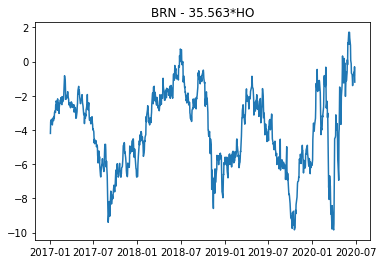

In [46]:
x = Data_Spread[['Close_HO']]
y = Data_Spread[['Close_BRN']]
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
Data_Spread['BRN - HO'] = Data_Spread['Close_BRN'] - regr.coef_[0][0] * Data_Spread['Close_HO']

x = Data_Spread['Date']
y = Data_Spread['BRN - HO']
plt.plot(x, y)
plt.title('BRN - 35.563*HO');



### Let's check if the given time series is stationary. To do this, we use the Dickey-Fuller test and the p-value

In [47]:
X = Data_Spread['BRN - HO']
result = adfuller(X)
#print('ADF Statistic: %f' % result[0])
print('p-value: ',  result[1])

p-value:  0.03442700962365738


#### As you can see from the p-value, this spread is also suitable for trading a range strategy

### Let's take a look at the spread between two grades of oil

Coefficients:  [[0.89923756]]


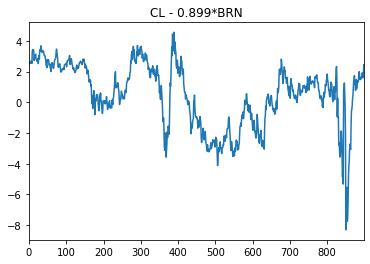

In [49]:
x = Data_Spread[['Close_BRN']]
y = Data_Spread[['Close_CL']]
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
Data_Spread['CL - BRN'] = Data_Spread['Close_CL'] - regr.coef_[0][0] * Data_Spread['Close_BRN']
Data_Spread['CL - BRN'].plot(title = 'CL - 0.899*BRN');


In [50]:
X = Data_Spread['CL - BRN']
result = adfuller(X)
#print('ADF Statistic: %f' % result[0])
print('p-value: ',  result[1])

p-value:  0.05133505736911242


#### The p value in this case is greater than 0.05. This time series cannot be called stationary. Also, if you evaluate it visually, you can see a small downtrend. This spread is not very suitable for trading.

### Next, we will use multiple linear regression and build a spread of three trading instruments (also called a basket)

In [51]:
x_basket = Data_Spread[['Close_BRN', 'Close_CL']]
y_basket = Data_Spread[['Close_HO']]
regr.fit(x_basket, y_basket)
Data_Spread['Basket_HO'] = Data_Spread['Close_HO'] - regr.coef_[0][0] * Data_Spread['Close_BRN'] - regr.coef_[0][1] * Data_Spread['Close_CL']

x_basket = Data_Spread[['Close_HO', 'Close_BRN']]
y_basket = Data_Spread[['Close_CL']]
regr.fit(x_basket, y_basket)
Data_Spread['Basket_CL'] = Data_Spread['Close_CL'] - regr.coef_[0][0] * Data_Spread['Close_HO'] - regr.coef_[0][1] * Data_Spread['Close_BRN']

x_basket = Data_Spread[['Close_HO', 'Close_CL']]
y_basket = Data_Spread[['Close_BRN']]
regr.fit(x_basket, y_basket)
Data_Spread['Basket_BRN'] = Data_Spread['Close_BRN'] - regr.coef_[0][0] * Data_Spread['Close_HO'] - regr.coef_[0][1] * Data_Spread['Close_CL']

Data_Basket = Data_Spread[['Basket_HO','Basket_CL','Basket_BRN']]
Data_Basket.head()

,Basket_HO,Basket_CL,Basket_BRN
0,0.191774,3.592818,-3.685313
1,0.174575,3.600584,-3.423804
2,0.172080,3.606889,-3.383721
3,0.173945,3.583345,-3.401097
4,0.168088,3.536377,-3.323726


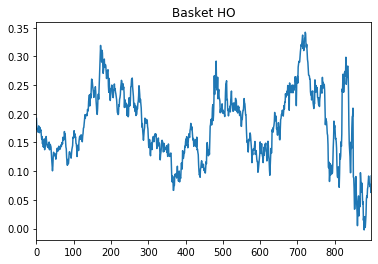

In [52]:
Data_Basket['Basket_HO'].plot(title = 'Basket HO');

In [54]:
X = Data_Basket['Basket_HO']
result = adfuller(X)
#print('ADF Statistic: %f' % result[0])
print('p-value: ',  result[1])

p-value:  0.027506674628512764


#### Despite an acceptable p-value, visual assessment shows that the last downside blow is breaking the previously established sideways trend. This basket loses in priority to the CL - HO spread

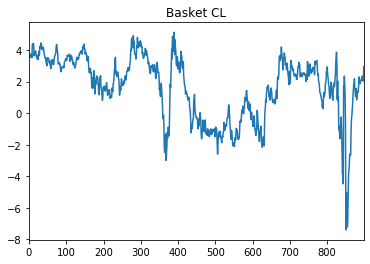

In [55]:
Data_Basket['Basket_CL'].plot(title = 'Basket CL');

In [56]:
X = Data_Basket['Basket_CL']
result = adfuller(X)
#print('ADF Statistic: %f' % result[0])
print('p-value: ',  result[1])

p-value:  0.046664961893467694


#### Despite an acceptable p-value, visual assessment shows that the last downside blow is breaking the previously established sideways trend. This basket loses in priority to the CL - HO spread

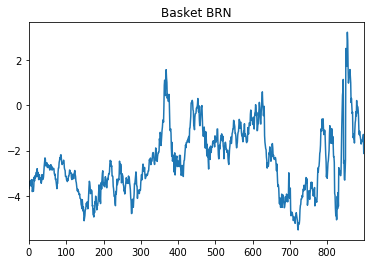

In [57]:
Data_Basket['Basket_BRN'].plot(title = 'Basket BRN');

In [58]:
X = Data_Basket['Basket_BRN']
result = adfuller(X)
#print('ADF Statistic: %f' % result[0])
print('p-value: ',  result[1])

p-value:  0.022670089474767022


#### Acceptable basket for trading with borders from 1 top to -5 bottom